# CIFAR10 dataset on the Artificial Neural Network

In this notebook, we are going to train the CIFAR10 dataset on the Artificial Neural Network (ANN). We consider the ANN contained in the compvis module, but also, we build a model with TensorFlow. Finally, we compare the performance and results from both models.

## Importing Libraries

In [1]:
from compvis.ann import ANN # compvis ANN
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

## Loading the CIFAR10 dataset from Scikit-Learn

In [2]:
((X_train, y_train), (X_test, y_test)) = cifar10.load_data()

## Splitting the dataset into training and test set

In [3]:
X_train = X_train.astype("float")/255. # Normalizing
X_test = X_test.astype("float")/255.
X_train = X_train.reshape((X_train.shape[0], 3072)) #reshaping
X_test = X_test.reshape((X_test.shape[0], 3072))

**Label binarize to transform labels into numbers**

In [4]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [9]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
              "horse", "ship", "truck"]

## Creating the model

In [5]:
ann = ANN([X_train.shape[1], 32, 16, 10], alpha=0.01)

In [6]:
print(ann)

NeuralNetwork: 3072-32-16-10


### Training the model

In [7]:
ann.fit(X_train, y_train, epochs = 100, verbose=10)

[INFO] Training the model
epoch 1, loss: 0.4363448
epoch 10, loss: 0.3664302
epoch 20, loss: 0.3429545
epoch 30, loss: 0.3325267
epoch 40, loss: 0.3233836
epoch 50, loss: 0.3187959
epoch 60, loss: 0.3161726
epoch 70, loss: 0.3119917
epoch 80, loss: 0.3097262
epoch 90, loss: 0.3075226
epoch 100, loss: 0.3073123


**Predicting on the model**

In [10]:
predictions = ann.predict(X_test)

**Evaluating the model**

In [11]:
cr = classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1),
                           target_names = labelNames)

In [12]:
print(cr)

              precision    recall  f1-score   support

    airplane       0.53      0.49      0.51      1000
  automobile       0.53      0.55      0.54      1000
        bird       0.35      0.27      0.31      1000
         cat       0.27      0.37      0.32      1000
        deer       0.36      0.46      0.40      1000
         dog       0.36      0.28      0.32      1000
        frog       0.43      0.51      0.46      1000
       horse       0.58      0.39      0.46      1000
        ship       0.60      0.59      0.60      1000
       truck       0.48      0.49      0.49      1000

    accuracy                           0.44     10000
   macro avg       0.45      0.44      0.44     10000
weighted avg       0.45      0.44      0.44     10000



## TensorFlow

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### Creating the Sequential model 3072-1024-512-10

In [14]:
model = Sequential() # To create the network
model.add(Dense(1024, input_shape=(3072, ), activation="relu")) # To connect the input layer with the first hidden layer
model.add(Dense(512, activation="relu")) # To connect the first hidden layer with the second hidden layer
model.add(Dense(10, activation="softmax")) # To connect the second hidden layer with the output layer

### Training the model

In [15]:
sgd = SGD(0.01) # to optimizer the model 

model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"]) # compiling the model

In [16]:
# Fitting
H = model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs = 100, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 103us/sample - loss: 1.8393 - accuracy: 0.3468 - val_loss: 1.7480 - val_accuracy: 0.3704
Epoch 2/100
50000/50000 [==============================] - 4s 87us/sample - loss: 1.6546 - accuracy: 0.4174 - val_loss: 1.6704 - val_accuracy: 0.4036
Epoch 3/100
50000/50000 [==============================] - 4s 89us/sample - loss: 1.5722 - accuracy: 0.4440 - val_loss: 1.5737 - val_accuracy: 0.4357
Epoch 4/100
50000/50000 [==============================] - 4s 88us/sample - loss: 1.5156 - accuracy: 0.4655 - val_loss: 1.5321 - val_accuracy: 0.4551
Epoch 5/100
50000/50000 [==============================] - 5s 97us/sample - loss: 1.4669 - accuracy: 0.4813 - val_loss: 1.4755 - val_accuracy: 0.4724
Epoch 6/100
50000/50000 [==============================] - 4s 86us/sample - loss: 1.4273 - accuracy: 0.4946 - val_loss: 1.5478 - val_accuracy: 0.4303
Epoch 7/100
50000/50000 [========================

Epoch 55/100
50000/50000 [==============================] - 4s 83us/sample - loss: 0.3762 - accuracy: 0.8775 - val_loss: 1.6636 - val_accuracy: 0.5437
Epoch 56/100
50000/50000 [==============================] - 4s 88us/sample - loss: 0.3668 - accuracy: 0.8803 - val_loss: 1.6078 - val_accuracy: 0.5609
Epoch 57/100
50000/50000 [==============================] - 4s 83us/sample - loss: 0.3461 - accuracy: 0.8879 - val_loss: 1.7259 - val_accuracy: 0.5403
Epoch 58/100
50000/50000 [==============================] - 4s 83us/sample - loss: 0.3291 - accuracy: 0.8947 - val_loss: 1.8384 - val_accuracy: 0.5224
Epoch 59/100
50000/50000 [==============================] - 4s 82us/sample - loss: 0.3198 - accuracy: 0.8985 - val_loss: 1.6009 - val_accuracy: 0.5632
Epoch 60/100
50000/50000 [==============================] - 4s 81us/sample - loss: 0.3058 - accuracy: 0.9030 - val_loss: 1.6413 - val_accuracy: 0.5661
Epoch 61/100
50000/50000 [==============================] - 4s 82us/sample - loss: 0.2913 - ac

### Predicting and evaluation


In [17]:
preds = model.predict(X_test, batch_size=32) # to predict

In [18]:
cr = classification_report(y_test.argmax(axis=1), preds.argmax(axis=1),
                           target_names = labelNames) 

In [19]:
print(cr)

              precision    recall  f1-score   support

    airplane       0.66      0.64      0.65      1000
  automobile       0.63      0.73      0.68      1000
        bird       0.43      0.52      0.47      1000
         cat       0.40      0.40      0.40      1000
        deer       0.50      0.47      0.49      1000
         dog       0.47      0.45      0.46      1000
        frog       0.64      0.61      0.63      1000
       horse       0.64      0.60      0.62      1000
        ship       0.70      0.69      0.69      1000
       truck       0.63      0.57      0.60      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



### Visualizing the metrics 

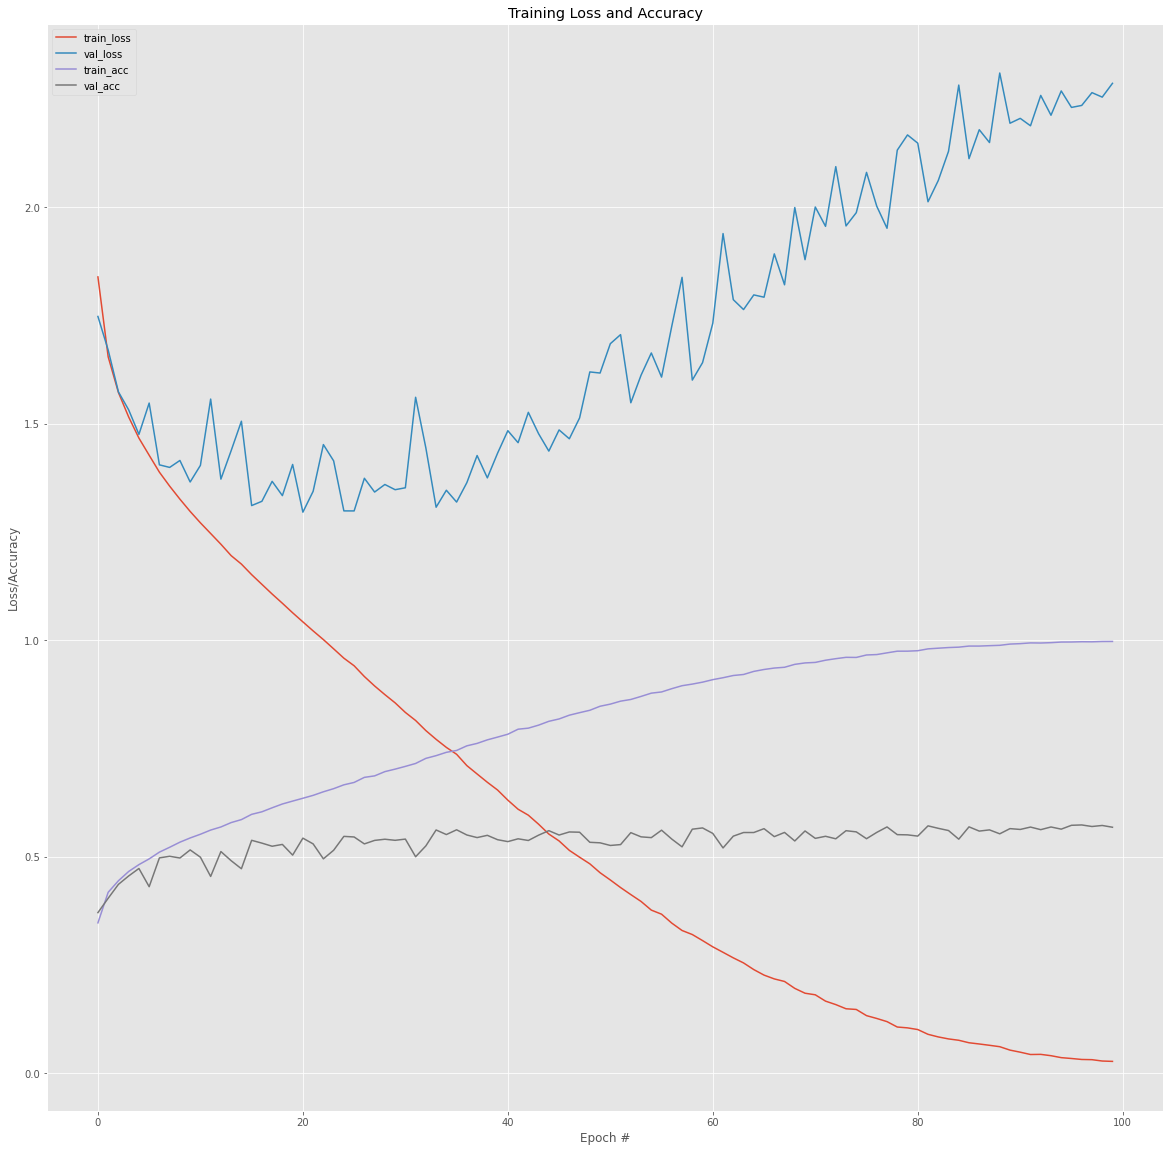

In [20]:
plt.style.use("ggplot")
plt.figure(figsize=(20,20))
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## Results

The ANN model provided by our module, does not show someones result and spend much time to run. On other hand, the model from TensorFlow turns quickly due to the CUDA and the results are more accurate due to a better regularization. So, the ANN model presented in this module, is merely pedagogical. We’ll always choose library as TensorFLow, Keras and PyTorch.

About the accuracy from the TensorFlow model, we can see a value of $57 \%$ on the test set. During the training, the train accuracy and loss show smooth curves, but on the validation set, the result are far from the training results, we are in a case of over-fitting, But this will be covered in more detail later.